<a href="https://colab.research.google.com/github/ashishbhatta/Energy_Arbitrage/blob/main/IEX_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import requests

# GitHub API endpoint for your folder
api_url = "https://api.github.com/repos/ashishbhatta/Energy_Arbitrage/contents/IEX%20Data"

r = requests.get(api_url)
r.raise_for_status()
files = r.json()

raw_links = []

for file in files:
    if file["name"].endswith(".xlsx"):   # only Excel files
        raw_links.append(file["download_url"])

print("Raw Excel file links:")
for l in raw_links:
    print(l)


Raw Excel file links:
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202023.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202024.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202025.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202023.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202024.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202025.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/December%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/December%

In [18]:
import pandas as pd

In [19]:
data = pd.DataFrame(columns = ["Date",
                               "Hour",
                               "Session ID",
                               "Time Block",
                               "Purchase Bid (MW)",
                               "Sell Bid (MW)",
                               "MCV (MW)",
                               "Final Scheduled Volume (MW)",
                               "MCP (Rs/MWh) *"])
data

,Date,Hour,Session ID,Time Block,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Final Scheduled Volume (MW),MCP (Rs/MWh) *


In [20]:
data = data.set_index("Date")
data

,Hour,Session ID,Time Block,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Final Scheduled Volume (MW),MCP (Rs/MWh) *
Date,,,,,,,,


In [21]:
df = pd.read_excel('https://github.com/ashishbhatta/Energy_Arbitrage/raw/refs/heads/main/IEX%20Data/April%202022.xlsx',skiprows=4,header = 0,index_col=0)

In [22]:
df

,Hour,Session ID,Time Block,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Final Scheduled Volume (MW),MCP (Rs/MWh) *
Date,,,,,,,,
01-04-2022,1,1,00:00-00:15,6912.20,2796.90,1892.90,1892.90,16744.25
01-04-2022,1,1,00:15-00:30,6741.60,2870.40,1966.40,1966.40,16000.58
01-04-2022,1,2,00:30-00:45,6849.20,2663.60,2099.60,2099.60,16689.62
01-04-2022,1,2,00:45-01:00,6558.30,2718.50,2104.50,2104.50,16000.12
01-04-2022,2,3,01:00-01:15,6295.20,2517.90,2157.47,2157.47,14998.50
...,...,...,...,...,...,...,...,...
29-04-2022,Avg (MW),25678.97,1528.48,1528.48,1528.48,12000.00,NaN,NaN
30-04-2022,Total (MWh),392763.90,100030.25,98972.73,98972.73,NaN,NaN,NaN
30-04-2022,Max (MW),31160.60,8057.40,7881.41,7881.41,12000.00,NaN,NaN


In [23]:
df_cleaned = df.dropna(subset=[df.columns[6], df.columns[7]])

In [24]:
df_cleaned.tail()

,Hour,Session ID,Time Block,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Final Scheduled Volume (MW),MCP (Rs/MWh) *
Date,,,,,,,,
30-04-2022,23,46,22:45-23:00,17018.90,4397.40,4397.40,4397.4,12000.0
30-04-2022,24,47,23:00-23:15,17327.70,4434.40,4434.40,4434.4,12000.0
30-04-2022,24,47,23:15-23:30,17189.90,4247.40,4247.40,4247.4,12000.0
30-04-2022,24,48,23:30-23:45,17586.90,4290.40,4290.40,4290.4,12000.0
30-04-2022,24,48,23:45-24:00,17313.10,4294.80,4294.80,4294.8,12000.0


In [25]:
df_cleaned.head()

,Hour,Session ID,Time Block,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Final Scheduled Volume (MW),MCP (Rs/MWh) *
Date,,,,,,,,
01-04-2022,1,1,00:00-00:15,6912.20,2796.90,1892.90,1892.90,16744.25
01-04-2022,1,1,00:15-00:30,6741.60,2870.40,1966.40,1966.40,16000.58
01-04-2022,1,2,00:30-00:45,6849.20,2663.60,2099.60,2099.60,16689.62
01-04-2022,1,2,00:45-01:00,6558.30,2718.50,2104.50,2104.50,16000.12
01-04-2022,2,3,01:00-01:15,6295.20,2517.90,2157.47,2157.47,14998.50


In [26]:
frames = [data,df_cleaned]

In [27]:
results = pd.concat(frames)

/tmp/ipython-input-4107715972.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat(frames)


In [28]:
results.head()

,Hour,Session ID,Time Block,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Final Scheduled Volume (MW),MCP (Rs/MWh) *
Date,,,,,,,,
01-04-2022,1,1,00:00-00:15,6912.20,2796.90,1892.90,1892.90,16744.25
01-04-2022,1,1,00:15-00:30,6741.60,2870.40,1966.40,1966.40,16000.58
01-04-2022,1,2,00:30-00:45,6849.20,2663.60,2099.60,2099.60,16689.62
01-04-2022,1,2,00:45-01:00,6558.30,2718.50,2104.50,2104.50,16000.12
01-04-2022,2,3,01:00-01:15,6295.20,2517.90,2157.47,2157.47,14998.50


In [29]:
  import matplotlib.pyplot as plt

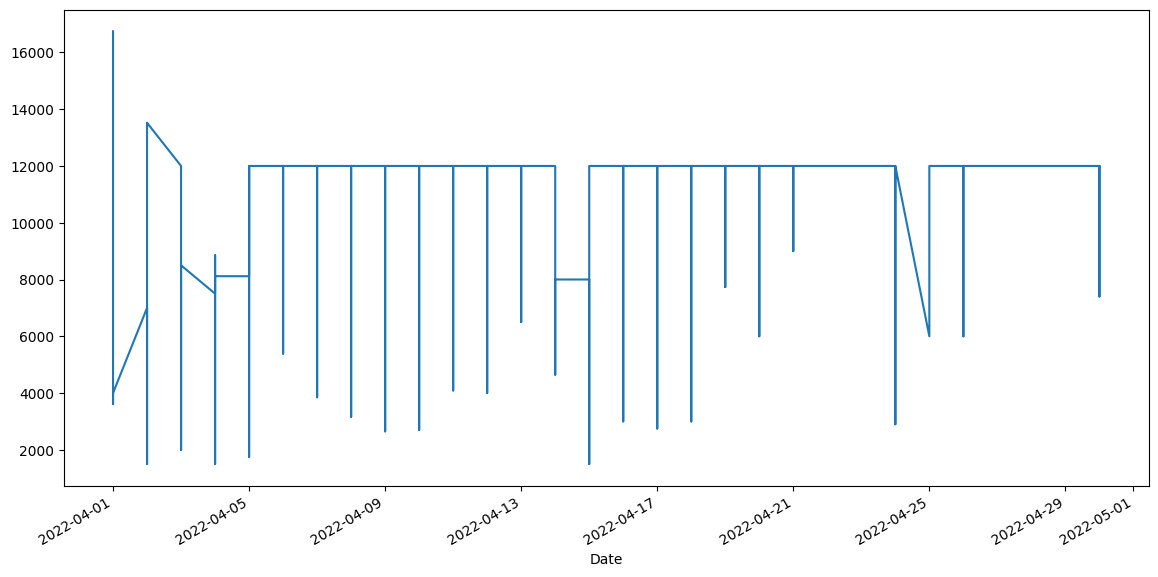

In [33]:
plt.figure(figsize=(14,7))  # Bigger figure
results["MCP (Rs/MWh) *"].plot(kind="line")
plt.show()